## Building a Recommendation System for Movie Rating

### Importing Librairies

In [73]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
ratings = pd.read_csv("/home/alainkuiete/Documents/DATA612/DATA612ASSINGMENTS-master/Movie_Ratings.csv")

### Inspecting the dataset

In [3]:
print(ratings.head())

     Unnamed: 0  Patrick C  Heather  Bryan  Patrick T  Thomas  aaron  vanessa  \
0         Alien        NaN      NaN    2.0        NaN     5.0    4.0      NaN   
1        Avatar        4.0      5.0    5.0        4.0     2.0    NaN      4.0   
2  Blade Runner        5.0      NaN    NaN        NaN     5.0    4.0      NaN   
3    Braveheart        4.0      NaN    5.0        NaN     4.0    4.0      3.0   
4     Dodgeball        5.0      4.0    3.0        2.0     4.0    NaN      4.0   

   greg  brian  ...  Zak  Matt  Chris.1  Josh  Amy  Valerie  Gary  Stephen  \
0   NaN    4.0  ...  NaN   NaN      4.0   3.0  NaN      NaN   2.0      5.0   
1   3.0    NaN  ...  5.0   NaN      NaN   4.0  3.0      2.0   1.0      4.0   
2   1.0    5.0  ...  NaN   NaN      3.0   NaN  3.0      3.0   1.0      NaN   
3   4.0    4.0  ...  5.0   NaN      4.0   NaN  3.0      4.0   5.0      5.0   
4   5.0    3.0  ...  3.0   NaN      3.0   NaN  4.0      3.0   4.0      3.0   

   Jessica  Jeff  
0      NaN   4.0  
1     

In [4]:
ratings_mat = np.array(ratings.iloc[:,1:])

In [5]:
print(ratings_mat[:10,:12])

[[nan nan  2. nan  5.  4. nan nan  4. nan nan nan]
 [ 4.  5.  5.  4.  2. nan  4.  3. nan  3.  5.  4.]
 [ 5. nan nan nan  5.  4. nan  1.  5.  5. nan nan]
 [ 4. nan  5. nan  4.  4.  3.  4.  4. nan  3.  4.]
 [ 5.  4.  3.  2.  4. nan  4.  5.  3.  4.  5.  5.]
 [ 4.  5.  4.  3.  3. nan  4.  5.  5.  5.  5.  5.]
 [nan  5.  5. nan  4.  4.  4.  5.  5.  5.  3.  4.]
 [nan  5.  4. nan  4. nan  2.  3.  3.  1. nan  3.]
 [ 2. nan  3.  5.  2. nan nan nan  1. nan  2.  2.]
 [ 4.  4.  3.  2. nan  5.  2.  3.  5.  2.  4.  4.]]


### Splitting the data into train and test set

In [6]:
rating = ratings_mat.copy()

In [7]:
rating_test = ratings_mat[5:16,5:16].copy()
rating[5:16,5:16]= 'nan' 
rating_train = rating

In [8]:
print(rating_train[5:16,5:16])

[[nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan]]


In [9]:
print(rating_test)

[[nan  4.  5.  5.  5.  5.  5.  5.  5.  3.  5.]
 [ 4.  4.  5.  5.  5.  3.  4.  3. nan  3.  5.]
 [nan  2.  3.  3.  1. nan  3.  2.  3.  2. nan]
 [nan nan nan  1. nan  2.  2.  2.  1.  1.  1.]
 [ 5.  2.  3.  5.  2.  4.  4.  3.  4.  3.  4.]
 [ 1.  4.  4.  4.  4.  2.  3.  3.  2.  1.  1.]
 [nan  3.  5.  4.  4. nan  5.  4. nan  5.  5.]
 [nan  1. nan  1.  1. nan nan  2. nan  3. nan]
 [ 3. nan  4.  5.  4. nan  5.  4. nan  5.  5.]
 [ 4.  4.  4. nan  4. nan  4. nan nan  3.  3.]
 [ 5. nan  5.  5.  5. nan nan  4. nan  4. nan]]


### Mean of train set

In [10]:
training_mean = np.nanmean(rating_train)
print(training_mean)

3.4971428571428573


### Creating a rating matrix of mean for training and test

In [11]:
rating_mean_mat_test = np.ones(rating_test.shape)*training_mean

In [12]:
rating_mean_mat_train = np.ones(rating_train.shape)*training_mean

### Calculating the RMSE for raw average for both training data and test data.

In [13]:
rmse1_test = math.sqrt(np.nanmean((rating_test - rating_mean_mat_test)**2))

In [14]:
print(rmse1_test)

1.3373015778814


In [15]:
rmse1_train = math.sqrt(np.nanmean((rating_train - rating_mean_mat_train)**2))

In [16]:
print(rmse1_train)

1.2867424460430998


### Calculating the bias for each item.

In [17]:
bias_movies = np.nanmean(rating_train, axis=0) - training_mean

In [18]:
print(bias_movies)

[ 0.11396825  0.43619048 -0.13350649 -0.36380952  0.18467532  0.25285714
 -0.06857143  0.39174603  0.42593407  0.50285714  1.07428571  0.72507937
 -0.24714286  0.21714286 -0.72791209  0.32103896 -0.83047619 -0.31532468
  0.68467532 -0.43831933 -0.10583851 -0.44952381 -0.16380952 -0.24714286
  0.13922078]


### Calculate the bias for each user.

In [19]:
bias_users = np.nanmean(rating_train, axis=1) - training_mean

In [20]:
print(bias_users)

[ 0.00285714  0.05285714  0.25285714  0.39759398  0.12190476  0.36
  0.39174603  0.32103896 -1.60825397 -0.13350649 -0.72791209  0.20285714
 -1.49714286  0.16952381  0.10285714  0.83619048 -1.36380952  0.00285714
  1.1115528   0.92390977 -2.37214286  0.58981366  0.78285714 -0.96380952
 -1.76380952]


### Calculate the RMSE for the baseline predictors for both your training data and your test data.

## Baseline Predictor = Raw avg + Bias users + Bias Movies

In [21]:
baseline = np.zeros((25, 25))
for i in range(len(bias_users)):
    for j in range(len(bias_movies)):
        baseline[i,j] = training_mean + bias_users[i] + bias_movies[j]
        if baseline[i,j] < 1 :
            baseline[i,j] = 1
        if baseline[i,j] > 5:
            baseline[i,j] = 5

In [22]:
 print(baseline)
baseline_predictor = baseline.copy()

[[3.61396825 3.93619048 3.36649351 3.13619048 3.68467532 3.75285714
  3.43142857 3.89174603 3.92593407 4.00285714 4.57428571 4.22507937
  3.25285714 3.71714286 2.77208791 3.82103896 2.66952381 3.18467532
  4.18467532 3.06168067 3.39416149 3.05047619 3.33619048 3.25285714
  3.63922078]
 [3.66396825 3.98619048 3.41649351 3.18619048 3.73467532 3.80285714
  3.48142857 3.94174603 3.97593407 4.05285714 4.62428571 4.27507937
  3.30285714 3.76714286 2.82208791 3.87103896 2.71952381 3.23467532
  4.23467532 3.11168067 3.44416149 3.10047619 3.38619048 3.30285714
  3.68922078]
 [3.86396825 4.18619048 3.61649351 3.38619048 3.93467532 4.00285714
  3.68142857 4.14174603 4.17593407 4.25285714 4.82428571 4.47507937
  3.50285714 3.96714286 3.02208791 4.07103896 2.91952381 3.43467532
  4.43467532 3.31168067 3.64416149 3.30047619 3.58619048 3.50285714
  3.88922078]
 [4.0087051  4.33092732 3.76123035 3.53092732 4.07941217 4.14759398
  3.82616541 4.28648287 4.32067091 4.39759398 4.96902256 4.61981621
  3.64

In [23]:
rmse2_test = math.sqrt(np.nanmean((rating_test - baseline[5:16, 5:16])**2))

In [24]:
print(rmse2_test)

1.0177378348800252


In [25]:
rmse2_train = math.sqrt(np.nanmean((rating_train - baseline)**2))

In [26]:
print(rmse2_train)

0.9139315000290194


### mesure of improvement

In [27]:
print((rmse2_test - rmse1_test)/rmse1_test)

-0.2389616136605767


### There is an improvement of 24% on the test set from the raw average model to the Baseline Model

In [28]:
print((rmse2_train - rmse1_train)/rmse1_train)

-0.28973237586163614


### There is an improvement of 29% on the train set from raw average model to Baseline Model

## Similarity

### Calculate on baseline errors = Actual Values - Predictions

In [29]:
baseline_error = rating_train - baseline

In [30]:
baseline_error

array([[            nan,             nan, -1.36649351e+00,
                    nan,  1.31532468e+00,  2.47142857e-01,
                    nan,             nan,  7.40659341e-02,
                    nan,             nan,             nan,
                    nan,             nan, -7.72087912e-01,
                    nan,             nan,  8.15324675e-01,
        -1.18467532e+00,             nan,             nan,
        -1.05047619e+00,  1.66380952e+00,             nan,
         3.60779221e-01],
       [ 3.36031746e-01,  1.01380952e+00,  1.58350649e+00,
         8.13809524e-01, -1.73467532e+00,             nan,
         5.18571429e-01, -9.41746032e-01,             nan,
        -1.05285714e+00,  3.75714286e-01, -2.75079365e-01,
         6.97142857e-01,  2.32857143e-01, -1.82208791e+00,
         1.12896104e+00,             nan,             nan,
        -2.34675325e-01, -1.11680672e-01, -1.44416149e+00,
        -2.10047619e+00,  6.13809524e-01,             nan,
         3.10779221e-01],
    

#### Center at zero

In [31]:
center_rating = rating_train -  np.nanmean(rating_train, axis=1)

#### Correct for errors

In [40]:
def similarity(a, j, k):
    num = 0
    dena = 0
    denb = 0
    for i in range(a.shape[0]):
        if (not(np.isnan(a[i,j]))  and not(np.isnan(a[i,k]))):
            num = num + a[i, j]*a[i, k]
            dena = dena + a[i, j]**2
            denb = denb + a[i, k]**2
    dena = math.sqrt(dena)
    denb = math.sqrt(denb)
    return num/(dena*denb)


In [41]:
similarity(baseline_error, 2, 1)

0.27253237978311184

In [42]:
center_rating[:,1]

array([  nan,  1.45,   nan,   nan,  0.45,  1.45,  1.45,  1.45,   nan,
        0.45,  0.45,   nan,   nan,   nan,  0.45,   nan, -2.55, -0.55,
        1.45,  1.45,   nan,  0.45, -0.55, -1.55,   nan])

In [43]:
center_rating[:,2]

array([-1.75,  1.25,   nan,  1.25, -0.75,  0.25,  1.25,  0.25, -0.75,
       -0.75, -2.75,  0.25, -2.75,  0.25,   nan,  1.25, -1.75,  0.25,
        0.25,  1.25,   nan, -0.75, -0.75, -0.75, -2.75])

In [44]:
if (np.isnan(center_rating[0,1])):
    print("yes")

yes


In [45]:
similarity_matrix = np.zeros((25,25))
for j in range(baseline_error.shape[1]):
    for k in range(baseline_error.shape[1]):
        similarity_matrix[j,k] = similarity(baseline_error, j, k)
        

In [46]:
similarity_matrix

array([[ 1.        , -0.17570406,  0.14107735, -0.3582204 ,  0.42106527,
        -0.31694546,  0.12332678, -0.21073644, -0.10913399, -0.04288478,
         0.43816879,  0.12528301, -0.51255443, -0.38090409,  0.39967416,
        -0.3487985 , -0.29864317,  0.29413255,  0.20713023, -0.22776867,
        -0.12758921, -0.01941303, -0.12183766,  0.10872387, -0.32553925],
       [-0.17570406,  1.        ,  0.27253238, -0.15024941, -0.16775865,
         0.01912833,  0.32986749, -0.4002889 , -0.51148796, -0.01910686,
         0.18130807,  0.22625098, -0.02173335,  0.04959253, -0.48479461,
         0.29451942,  0.0734775 ,  0.16501904,  0.03288858, -0.30890833,
        -0.06444653,  0.07204456, -0.18679371, -0.43182568,  0.27058357],
       [ 0.14107735,  0.27253238,  1.        ,  0.47204873, -0.40191285,
        -0.15497579,  0.05642682, -0.58019636, -0.21505412, -0.3579166 ,
        -0.12534552, -0.4796522 ,  0.31670355,  0.12830474, -0.34736775,
         0.5421475 , -0.32539894,  0.20755558,  0

In [47]:
sm = similarity_matrix
for i in range(25):
    for j in range(25):
        if (i==j):
            sm[i,j] = abs(sm[i,j])
            sm[i,i] = 0
    

## Neighborhood Predictor

In [48]:
nearest_neighbor = np.argmax(sm, axis=1)

In [106]:
nearest_neighbor[2,]

IndexError: too many indices for array

In [94]:
neighborhood_predictor = np.zeros((25,25))
for j in range(baseline_predictor.shape[0]):
    for k in range(baseline_predictor.shape[1]):
        if (np.isnan(baseline_error[j,k])):
            baseline_error[j,k] = 0.
        if (similarity_matrix[k, nearest_neighbor[k]]>0):
            neighborhood_predictor[j,k] = baseline_predictor[j,k] + baseline_error[j, nearest_neighbor[k]]
        else:
             neighborhood_predictor[j,k] = baseline_predictor[j,k] - baseline_error[j, nearest_neighbor[k]]
        if neighborhood_predictor[j,k] < 1 :
            neighborhood_predictor[j,k] = 1
        if neighborhood_predictor[j,k] > 5:
            neighborhood_predictor[j,k] = 5

In [95]:
neighborhood_predictor

array([[3.61396825, 3.93619048, 3.36649351, 1.76969697, 3.68467532,
        3.75285714, 3.67857143, 3.89174603, 3.15384615, 4.00285714,
        4.57428571, 3.45299145, 3.25285714, 3.96428571, 1.58741259,
        2.45454545, 2.66952381, 2.13419913, 3.41258741, 3.06168067,
        3.39416149, 3.05047619, 3.33619048, 3.25285714, 3.63922078],
       [4.03968254, 4.5047619 , 4.54545455, 4.76969697, 4.07070707,
        4.03571429, 3.48142857, 3.94174603, 2.15384615, 4.05285714,
        5.        , 2.45299145, 3.30285714, 3.76714286, 2.58741259,
        5.        , 1.77777778, 1.13419913, 2.41258741, 3.11168067,
        2.39130435, 2.15873016, 4.51515152, 3.19117647, 3.68922078],
       [3.86396825, 4.18619048, 3.61649351, 3.38619048, 5.        ,
        4.00285714, 3.67857143, 4.14174603, 5.        , 4.25285714,
        4.82428571, 5.        , 3.50285714, 3.96428571, 3.02208791,
        4.07103896, 1.        , 1.13419913, 5.        , 3.31168067,
        4.39130435, 1.        , 3.58619048, 3.

In [104]:
 v1 = ratings['vanessa'][np.isnan(ratings['vanessa'])].index[1]

In [108]:
neighborhood_predictor[v1,7]

4.141746031746031

In [52]:
rmse3_test = math.sqrt(np.nanmean((rating_test - neighborhood_predictor[5:16, 5:16])**2))

In [53]:
print(rmse3_test)

0.901476328457795


In [54]:
rmse3_train = math.sqrt(np.nanmean((rating_train - neighborhood_predictor)**2))

In [55]:
print(rmse3_train)

0.8754591465592377


In [56]:
print((rmse3_test - rmse2_test)/rmse2_test)

-0.114235220935788


### There is an improvement of 2.8% on the test set from the Baseline Predictor model to the Neighborhood Predictor Model

In [57]:
print((rmse3_train - rmse2_train)/rmse2_train)

-0.042095445302585625


### There is an improvement of 3.7% on the train set from the Baseline Predictor model to the Neighborhood Predictor Model

## Matrice Factorization SVD

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""

In [58]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [59]:
R = np.zeros((25,25))
for j in range(25):
    for k in range(25):
        R[j,k] = rating_train[j,k]
        if (np.isnan(R[j,k])):
            R[j,k] = 0.
        

In [78]:
R = np.array(R)
N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [79]:
#print(nP)

In [80]:
#print(nQ)

In [81]:
print(np.dot(nP,nQ.T))

[[ 3.89613408  4.27160411  3.00247196  2.86036364  4.40307116  3.7998787
   3.44007815  5.27057842  3.83140955  4.1907547   4.79726966  4.31753764
   3.70216963  3.26566723  2.12447088  3.01458437  3.1879134   2.98023631
   3.27963953  3.38793552  4.75713717  3.70295132  3.74005283  3.71658884
   4.20246674]
 [ 3.73258586  3.78069262  3.81250867  4.09716156  3.67230285  3.35113213
   3.17178196  2.65920026  4.20200553  3.84833476  3.71221792  3.96114293
   3.48835577  3.56502355  3.12201723  4.85141733  2.4049834   3.45596673
   4.18967738  2.98627861  3.09959138  2.81518058  3.27515644  3.21316638
   3.57708615]
 [ 4.45101677  4.28160653  5.22757256  5.87325901  3.98180884  3.78564168
   3.69210648  1.43154975  5.39754779  4.46786667  3.78361055  4.59609035
   4.11727071  4.56883265  4.5138206   7.21409256  2.3954767   4.55842592
   5.75858275  3.37224872  2.63519541  2.82406057  3.68146142  3.57878464
   3.93883541]
 [ 4.08642577  4.24726913  3.84895722  4.01451044  4.20995744  3.769

In [82]:
svd = np.dot(nP,nQ.T)

In [83]:
rmse4_test = math.sqrt(np.nanmean((rating_test - svd[5:16, 5:16])**2))

In [84]:
print(rmse4_test)

1.2979781146245313


In [85]:
print((rmse4_test - rmse3_test)/rmse3_test)

0.439836048546115


In [86]:
rmse4_train = math.sqrt(np.nanmean((rating_train - svd)**2))

In [87]:
print(rmse4_train)

0.7606508737182399


In [88]:
print((rmse4_train - rmse3_train)/rmse3_train)

-0.13114064007694887


In [89]:
'''rmse4 = []
for K in range(1,15):
    nP, nQ = matrix_factorization(R, P, Q, K)
    svd = np.dot(nP,nQ.T)
    rmse4.append(math.sqrt(np.nanmean((rating_test - svd[5:16, 5:16])**2)))
               
                   '''

'rmse4 = []\nfor K in range(1,15):\n    nP, nQ = matrix_factorization(R, P, Q, K)\n    svd = np.dot(nP,nQ.T)\n    rmse4.append(math.sqrt(np.nanmean((rating_test - svd[5:16, 5:16])**2)))\n               \n                   '

In [90]:
'''plt.plot(range(1, 15), rmse4)
plt.title('Best K for SVD')'''

"plt.plot(range(1, 15), rmse4)\nplt.title('Best K for SVD')"

### Comparison of different RMSE

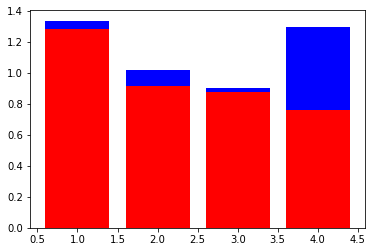

In [93]:
plt.bar([1,2,3,4], [rmse1_test, rmse2_test, rmse3_test, rmse4_test], color='blue')
plt.bar([1,2,3,4], [rmse1_train, rmse2_train, rmse3_train, rmse4_train], color= 'red')
plt.show()